In [41]:
import pandas as pd
%matplotlib inline

In [42]:
df = pd.read_csv('df_final.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 55 columns):
Unnamed: 0                       2175 non-null int64
tweet_id                         2175 non-null int64
in_reply_to_status_id_x          78 non-null float64
in_reply_to_user_id_x            78 non-null float64
timestamp                        2175 non-null object
source_x                         2175 non-null object
text                             2175 non-null object
expanded_urls                    2117 non-null object
rating_numerator                 2175 non-null int64
rating_denominator               2175 non-null int64
name                             2175 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2173 non-null object
display_text_range               2173 non-null float64
entities                         2173 non-null object
extended_entities                1992 

In [44]:
df.drop(columns=['id', 'Unnamed: 0', 'in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

KeyError: "['in_reply_to_status_id' 'in_reply_to_user_id'] not found in axis"

In [45]:
df.loc[df.favorite_count.isnull()]

,Unnamed: 0,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
975,3722,680055455951884288,NaN,NaN,2015-12-24 16:00:30,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10,10,...,samoyed,0.995466,True,great_pyrenees,0.001834,True,pomeranian,0.000667,True,None
1582,2935,754011816964026368,NaN,NaN,2016-07-15 17:56:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,12,10,...,french_bulldog,0.600985,True,boston_bull,0.273176,True,boxer,0.056772,True,None


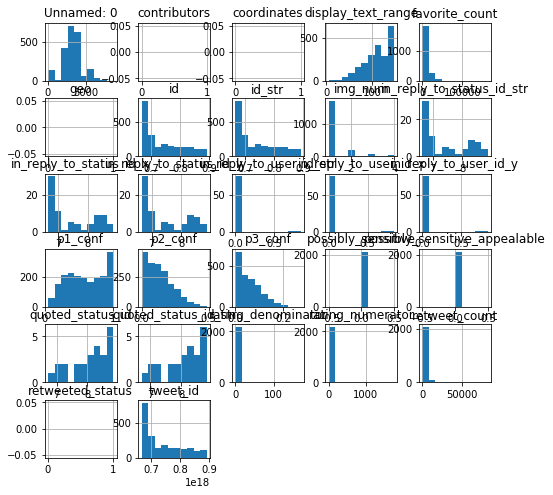

In [46]:
df.hist(figsize=(8, 8));

In [47]:
df.groupby('dog_stage').sum()

,Unnamed: 0,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,rating_numerator,rating_denominator,contributors,coordinates,display_text_range,favorite_count,...,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted_status,img_num,p1_conf,p2_conf,p3_conf
dog_stage,,,,,,,,,,,,,,,,,,,,,
None,5572203.0,1.347023e+21,5.220729e+19,8.405481e+17,24902.0,19382.0,0.0,0.0,201795.0,14897530.0,...,0.0,0.0,1.718526e+19,1.718526e+19,4484939.0,0.0,2012.0,996.878392,226.507324,102.936025
doggo,39581.0,5.959498e+19,2.314904e+18,5.025003e+09,889.0,750.0,0.0,0.0,7526.0,1340778.0,...,0.0,0.0,1.642981e+18,1.642981e+18,468888.0,0.0,81.0,36.354634,9.912485,3.911219
floofer,29358.0,7.656406e+18,0.000000e+00,0.000000e+00,118.0,100.0,0.0,0.0,1187.0,111743.0,...,0.0,0.0,0.000000e+00,0.000000e+00,38373.0,0.0,9.0,4.619160,1.264771,0.467682
pupper,1288083.0,1.687385e+20,2.854682e+18,1.678794e+10,2532.0,2340.0,0.0,0.0,25533.0,1680915.0,...,0.0,0.0,1.382027e+18,1.382027e+18,559440.0,0.0,264.0,130.253893,27.252383,11.763012
puppo,174325.0,2.022401e+19,7.727430e+17,7.305050e+17,302.0,250.0,0.0,0.0,2722.0,547000.0,...,0.0,0.0,0.000000e+00,0.000000e+00,164773.0,0.0,33.0,16.212114,3.095430,1.057526


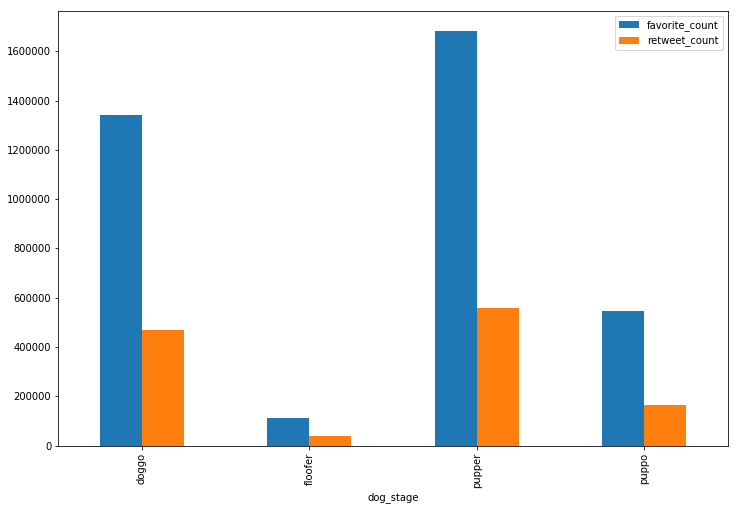

In [48]:
df_dog = df.groupby('dog_stage').sum()[['favorite_count', 'retweet_count']]
df_dog.drop(df_dog.index[[0]]).plot(kind='bar', figsize=(12, 8));

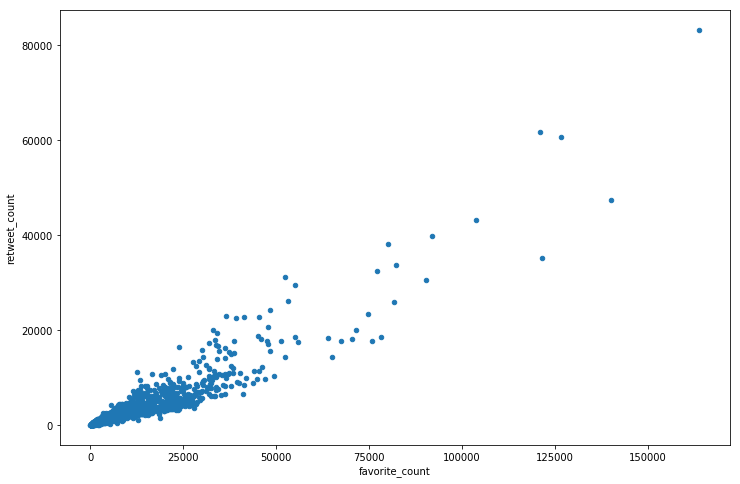

In [49]:
df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', figsize=(12, 8));

In [55]:
df.display_text_range.max()

148.0

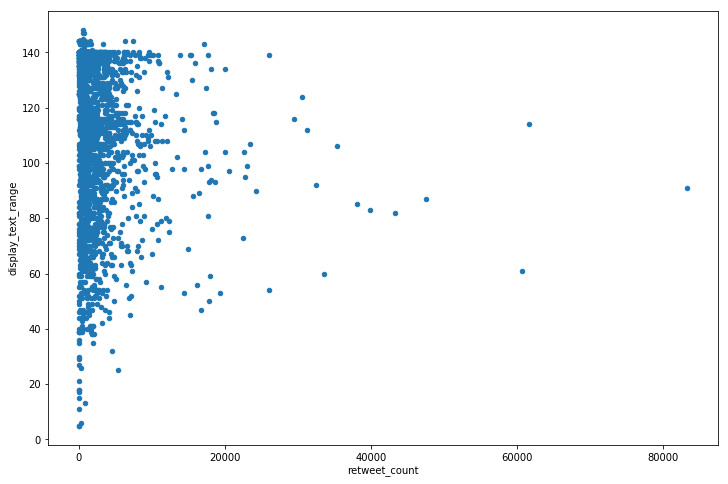

In [56]:
df.plot(kind='scatter', x = 'retweet_count', y = 'display_text_range', figsize=(12, 8));